In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [2]:
df = pd.read_csv('../data/sysMPRA/Table 2.csv', index_col=0)
df

,seq_ID,enhancer_ID,enhancer_seq,barcode,full_oligo_seq,source,subSource,dnaDetect,rnaDetect
1,CS6000114723_mm10_chr6_1,CS6000114723_mm10_chr6,TCCCCATTCCAGTGATGCTTGTCAGCCGTGCTGTGGCTAACACAGT...,ATTCCTTTAGCTACAA,GCTAAGGGCCTAACTGGCCGCTTCACTGTCCCCATTCCAGTGATGC...,MEW,MEW,False,False
2,CS6000114723_taeGut2_chr12_1,CS6000114723_taeGut2_chr12,CTCCATCACGGCGAATTCCTGTCAGCTGCACTCTCGCTAACACAAT...,GCCTATTAACTCACTA,GCTAAGGGCCTAACTGGCCGCTTCACTGCTCCATCACGGCGAATTC...,MEW,MEW,False,False
3,CS6000114723_hg38_chr3_1,CS6000114723_hg38_chr3,CTCCATCACAGTGGACGCCTGTCAGCTGCACTCTTGCTAACACAAT...,ATATGTTTTATTTCCC,GCTAAGGGCCTAACTGGCCGCTTCACTGCTCCATCACAGTGGACGC...,MEW,MEW,False,False
4,CS6000114723_panTro4_chr3_1,CS6000114723_panTro4_chr3,CTCCATCACAGTGGACGCCTGTCAGCTGCACTCTTGCTAACACAAT...,ACGTAAATGGATATGA,GCTAAGGGCCTAACTGGCCGCTTCACTGCTCCATCACAGTGGACGC...,MEW,MEW,False,False
5,CS6000114723_Raegyp2_NW_015493843.1_1,CS6000114723_Raegyp2_NW_015493843.1,CTCCATCACAGTAGATTCTTGTCAGCTGCACTCTTGCTAACACAAT...,TCGTTGGGCTAGCTGC,GCTAAGGGCCTAACTGGCCGCTTCACTGCTCCATCACAGTAGATTC...,MEW,MEW,False,True
...,...,...,...,...,...,...,...,...,...
9216,GC70_06_20,GC70_06,CACGGAGCCGGCGGGCTAACCACGAGCGTCAGCCGGCGCCGAGGGG...,TGGACCTGGTGTAAAC,GCTAAGGGCCTAACTGGCCGCTTCACTGCACGGAGCCGGCGGGCTA...,GC,GC_70,True,True
9217,GC70_07_20,GC70_07,TGACGGGATGGGACGTGGTGCAGAACGCCAATAAATCGTGGCATGG...,TGCGATGTGGCGGCGG,GCTAAGGGCCTAACTGGCCGCTTCACTGTGACGGGATGGGACGTGG...,GC,GC_70,True,True
9218,GC70_08_20,GC70_08,CCAGTCCCGCGCAGGCGCTCCCGCCCGGCACGTAGGCCTCTCGCTA...,AGATGGTCTACGTGAC,GCTAAGGGCCTAACTGGCCGCTTCACTGCCAGTCCCGCGCAGGCGC...,GC,GC_70,True,True
9219,GC70_09_20,GC70_09,CTAGCGGCCGGGACCCTAGCATCTCGCTCCAGAGATCTAACGGCCC...,TGGTAAAGCACAACTG,GCTAAGGGCCTAACTGGCCGCTTCACTGCTAGCGGCCGGGACCCTA...,GC,GC_70,False,False


In [3]:
barcode_seq_map = dict(zip(df['barcode'], df['enhancer_seq']))

In [4]:
DNA_counts = pd.read_csv('../data/sysMPRA/Table 4.csv', index_col=0)
DNA_counts = DNA_counts[sorted(DNA_counts.columns)]
DNA_counts

,Cortex_1_1,Cortex_2_1,Cortex_6_1,Cortex_7_1,Cortex_8_1,HMC3_C_2,HMC3_D_2,HMC3_E_2,Heart_9_2,Hippocampus_1_1,Hippocampus_2_1,Hippocampus_5_1,Hippocampus_6_1,Hippocampus_7_1,Hippocampus_8_1,Hypothalamus_10_2,Hypothalamus_9_2,Kidney_10_2,Kidney_9_2,Liver_10_2,Liver_7_1,Liver_8_1,Liver_9_2,Lung_10_2,M1_1_1,M1_2_1,M1_5_1,M1_6_1,M1_7_1,M1_8_1,Muscle_10_2,Ovaries_10_2,PFC_5_1,PFC_6_1,PFC_7_1,PFC_8_1,Striatum_1_1,Striatum_2_1,Striatum_5_1,Striatum_6_1,Striatum_7_1,Striatum_8_1,Testies_9_2
CTCCCGCAGTCCGCTG,3831,3115,5640,8674,6817,9467,4008,16685,6353,3264,3036,6416,3478,9284,7927,4094,4267,16204,8816,16490,9140,7564,15080,15198,4400,4039,7202,4864,7294,4876,6052,4328,10940,1910,5465,4946,3921,821,5467,4003,6331,5774,1443
CTACAGGACATACGTT,2470,1561,2971,5785,5623,9675,3716,41012,4446,2171,1948,3677,3203,3473,5224,5156,14044,3443,12048,1892,3399,4495,10577,3667,3155,2449,6717,5254,2687,6079,4,4966,3854,1669,3025,5580,2292,437,2467,2477,3907,4492,2951
TCAACTGTGCTCTAAC,573,546,1194,311,575,2039,806,5725,1,438,320,1982,1081,2603,1183,2876,20,935,911,2411,1883,1629,1599,43,232,748,1266,452,1173,1708,1,21,5046,1470,167,733,861,103,729,1204,401,719,736
CGTCAAGAGGTAGTGG,1840,1523,2412,4031,2535,6516,2337,49599,2870,1609,912,2190,1282,3187,4167,1702,781,2292,38,2126,3560,3392,1624,15,1640,2121,1261,1088,4434,4638,0,1353,2947,168,4842,2069,1917,302,1194,1954,3481,2506,3123
TTTGAGTCGTACAAGG,891,790,1839,1915,1919,3344,1207,12015,3563,986,690,2047,1326,931,584,2806,2095,2963,1636,1955,1727,479,1617,141,1321,527,1890,1738,1600,1073,0,51,349,1915,1717,2137,1144,194,2117,874,1155,1411,2180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGTATTTCGGGGTATC,6006,4551,7200,6525,11783,21545,7762,72561,6669,6243,5048,10265,5235,9402,7938,10151,5369,24535,22273,20222,14604,19337,24741,3405,6475,7127,8399,6847,11609,11193,4888,9072,18344,6869,10189,6312,5525,899,10166,4976,9388,7823,5942
TATGGCGATCTCTGCG,9205,7282,17498,16779,17721,21574,8839,13321,16525,8986,8022,13393,8133,15809,15907,8075,17494,32265,34574,34558,16574,23672,39579,14576,11835,10591,14876,9291,17562,22548,17432,21471,26978,10148,15742,17746,10706,1674,15415,12446,11562,14826,3907
TGGACCTGGTGTAAAC,900,975,1422,704,1072,3996,1241,26296,3783,1018,792,1294,841,2189,1057,5,3,500,17,7883,1988,54,2381,1403,775,1013,1757,2278,462,375,3,2371,941,28,1743,384,1047,145,1173,1117,428,1492,4298
TGCGATGTGGCGGCGG,766,595,1872,2138,1005,3359,1243,10696,3,411,482,1153,472,2151,1675,1320,9,8459,7430,2621,1494,54,2209,2820,844,883,617,1163,140,1961,0,46,825,34,87,2749,838,76,1334,813,957,1403,452


In [5]:
RNA_counts = pd.read_csv('../data/sysMPRA/Table 5.csv', index_col=0)
RNA_counts = RNA_counts[sorted(RNA_counts.columns)]
RNA_counts

,Cortex_1_1,Cortex_1_2,Cortex_2_1,Cortex_2_2,Cortex_6_1,Cortex_7_1,Cortex_8_1,Cortex_8_2,HMC3_A_2,HMC3_B_2,HMC3_C_2,HMC3_E_2,Hippocampus_1_1,Hippocampus_2_1,Hippocampus_2_2,Hippocampus_5_1,Hippocampus_5_2,Hippocampus_6_1,Hippocampus_7_1,Hippocampus_8_1,Hypothalamus_10_2,Hypothalamus_9_2,Kidney_10_2,Kidney_9_2,Liver_10_2,Liver_7_1,Liver_7_2,Liver_8_1,Liver_8_2,Liver_9_2,Lung_10_2,M1_1_1,M1_2_1,M1_5_1,M1_6_1,M1_7_1,M1_8_1,Muscle_10_2,PFC_5_1,PFC_6_1,PFC_7_1,PFC_8_1,Striatum_1_1,Striatum_1_2,Striatum_2_1,Striatum_5_1,Striatum_5_2,Striatum_6_1,Striatum_7_1,Striatum_8_1
CTCCCGCAGTCCGCTG,12508,16973,347,30,3236,5265,12059,39,353,29024,47891,10316,12913,7227,7467,385,2,1274,7580,34540,52,46,7,4,274,12861,15925,507,92,263,50,26316,5875,330,10761,9905,9835,3,19016,162,405,6888,10904,8380,5922,495,12,686,44396,41371
CTACAGGACATACGTT,13440,19217,308,27,9170,13742,16490,57,441,28274,35735,13363,4171,7393,8350,214,2,317,17501,8420,21,51,0,2,168,8061,11300,273,94,300,31,9123,64,103,135,329,550,2,23,46,130,108,11496,9753,280,233,14,3310,17574,14194
TCAACTGTGCTCTAAC,3239,4830,90,6,58,226,189,39,100,3779,8960,2904,60,84,1,595,736,84,287,5014,2,4,0,0,182,728,46,58205,41869,206,5,209,1815,99,113,18729,409,0,85,149,305,23807,107,34,6537,76,3,3886,370,386
CGTCAAGAGGTAGTGG,7551,7572,130,7,1341,7479,222,22,242,18471,17922,8996,3385,1974,1249,6006,5086,129,506,211,7,23,0,3,72,190,15,44,45,147,39,195,35,83,3274,277,141,1,61,68,185,7853,11031,7737,229,250,18,870,32204,519
TTTGAGTCGTACAAGG,3085,3923,106,5,2476,7604,7585,10,107,8131,6033,4543,2830,3440,3753,55,0,85,238,275,4,12,0,0,82,13202,17407,212,51,156,10,121,35,38,70,132,4502,0,16,15,43,59,6486,5433,110,123,3,192,3526,13784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGTATTTCGGGGTATC,15223,20996,1677,1368,17801,32949,6012,70,558,38254,41769,30999,8824,3219,2265,5372,6711,580,46814,7517,43,40,3,2,357,18113,24313,345,189,481,2666,3473,96,190,222,744,6885,3,69,69,234,111,393,260,10886,275,33,343,9261,586
TATGGCGATCTCTGCG,10671,14721,1323,949,2349,38402,6898,85,481,40897,91757,20012,27113,22796,25493,880,78,1228,31485,55717,50,84,7,4,341,549,21,1084,673,454,133,5639,3396,448,567,21710,11272,4,14465,297,563,10520,32899,28109,11190,10749,11364,55451,35189,14728
TGGACCTGGTGTAAAC,3094,4115,96,3,1584,146,117,10,153,13520,9671,6594,2775,2845,2623,104,2,124,292,13545,5,16,0,1,139,16539,20654,160,50,170,16,291,17,13,27,45,67,0,67,112,7443,12513,84,61,6562,43,6,75,132,166
TGCGATGTGGCGGCGG,611,733,57,0,71,209,7537,5,58,6830,7503,5373,724,37,0,23,0,2750,172,203,5,7,1,2,69,55,5,93,12,66,4,5015,45,65,57,7907,269,0,10,15,35,46,134,36,51,39,4,90,205,9546


In [12]:
DNA_counts = pd.read_csv('../data/sysMPRA/Table 4.csv', index_col=0)
RNA_counts = pd.read_csv('../data/sysMPRA/Table 5.csv', index_col=0)

common_cols = sorted(set(DNA_counts.columns) & set(RNA_counts.columns))
only_DNA = sorted(set(DNA_counts.columns) - set(RNA_counts.columns))
only_RNA = sorted(set(RNA_counts.columns) - set(DNA_counts.columns))
print("DNA 和 RNA 共同存在：", common_cols)
print("仅 DNA 存在：", only_DNA)
print("仅 RNA 存在：", only_RNA)

DNA_counts = DNA_counts[common_cols]
RNA_counts = RNA_counts[common_cols]

DNA 和 RNA 共同存在： ['Cortex_1_1', 'Cortex_2_1', 'Cortex_6_1', 'Cortex_7_1', 'Cortex_8_1', 'HMC3_C_2', 'HMC3_E_2', 'Hippocampus_1_1', 'Hippocampus_2_1', 'Hippocampus_5_1', 'Hippocampus_6_1', 'Hippocampus_7_1', 'Hippocampus_8_1', 'Hypothalamus_10_2', 'Hypothalamus_9_2', 'Kidney_10_2', 'Kidney_9_2', 'Liver_10_2', 'Liver_7_1', 'Liver_8_1', 'Liver_9_2', 'Lung_10_2', 'M1_1_1', 'M1_2_1', 'M1_5_1', 'M1_6_1', 'M1_7_1', 'M1_8_1', 'Muscle_10_2', 'PFC_5_1', 'PFC_6_1', 'PFC_7_1', 'PFC_8_1', 'Striatum_1_1', 'Striatum_2_1', 'Striatum_5_1', 'Striatum_6_1', 'Striatum_7_1', 'Striatum_8_1']
仅 DNA 存在： ['HMC3_D_2', 'Heart_9_2', 'Ovaries_10_2', 'Testies_9_2']
仅 RNA 存在： ['Cortex_1_2', 'Cortex_2_2', 'Cortex_8_2', 'HMC3_A_2', 'HMC3_B_2', 'Hippocampus_2_2', 'Hippocampus_5_2', 'Liver_7_2', 'Liver_8_2', 'Striatum_1_2', 'Striatum_5_2']


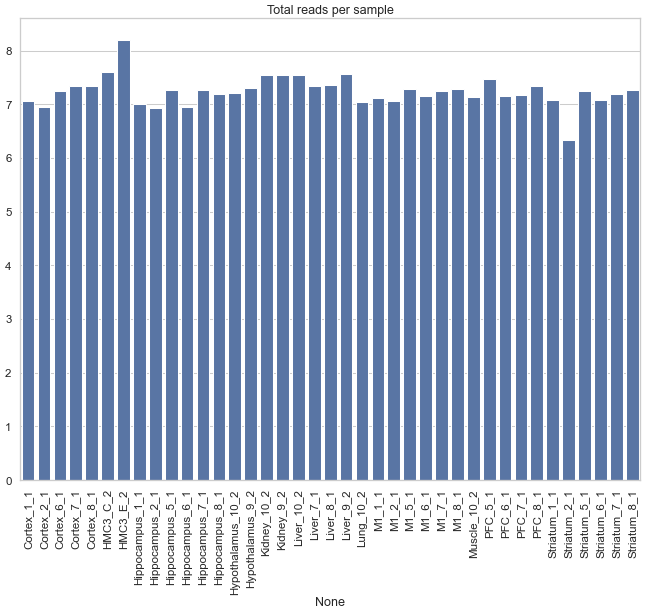

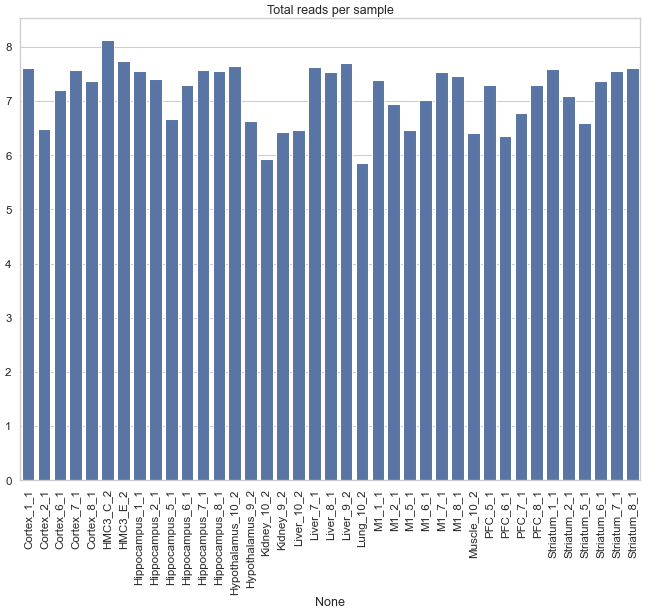

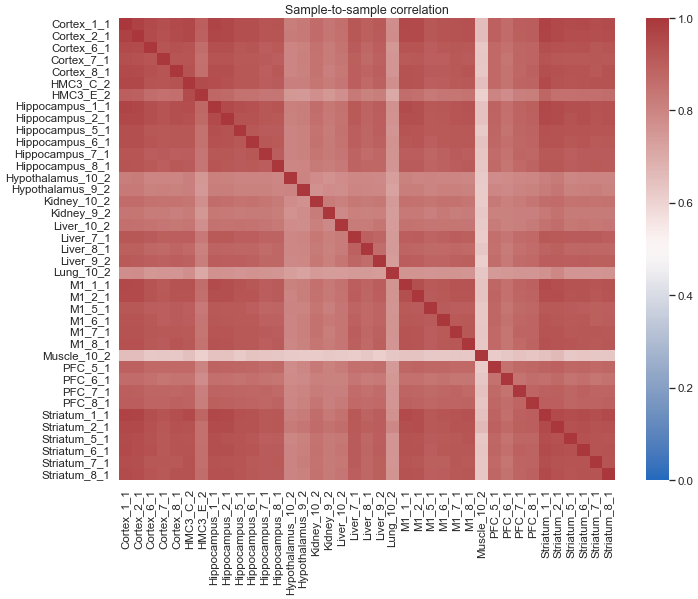

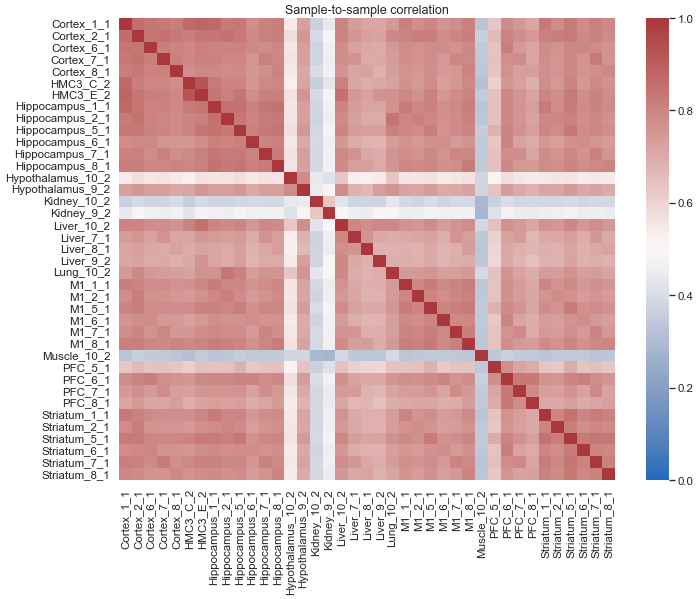

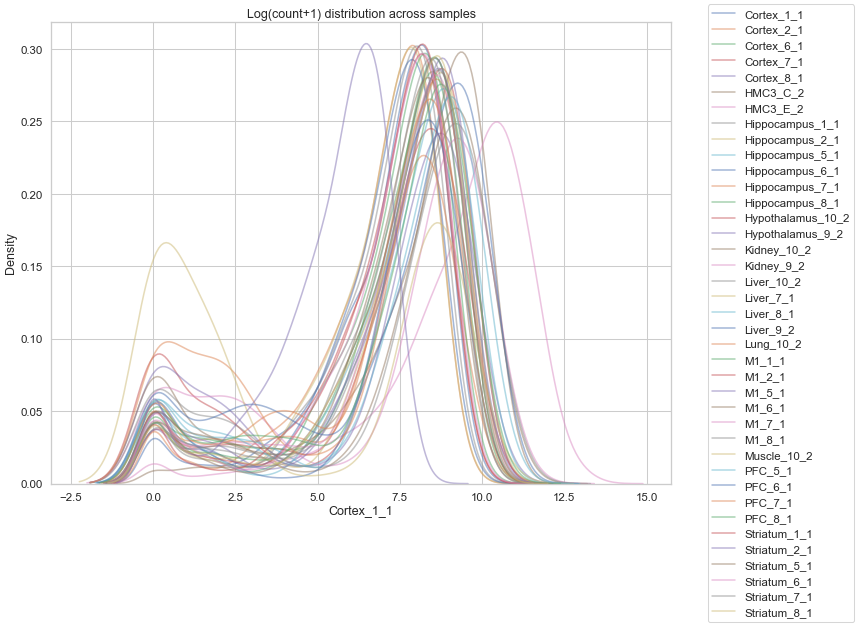

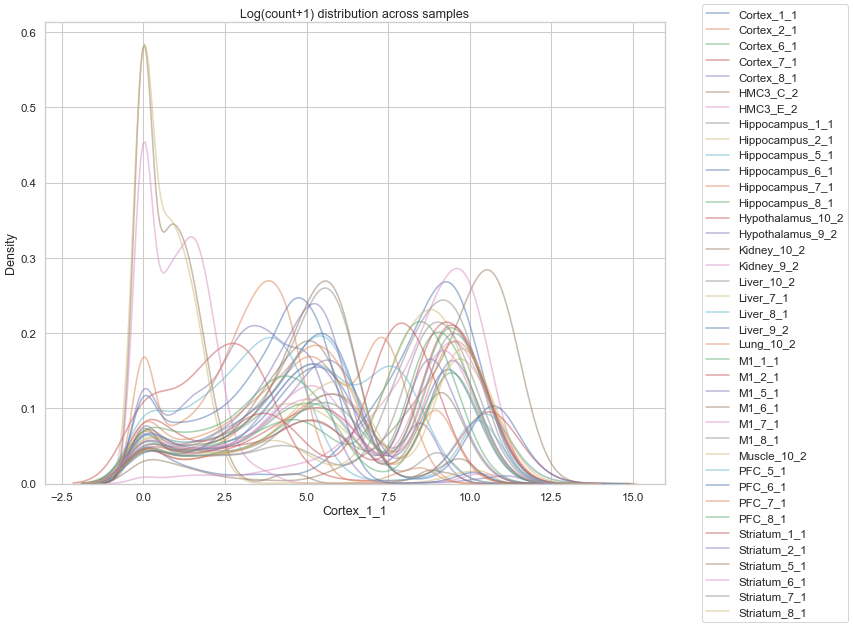

In [13]:
total_reads = np.log10(DNA_counts.sum(axis=0))
plt.figure(figsize=(16,12), dpi=50)
sns.barplot(x=total_reads.index, y=total_reads.values)
plt.xticks(rotation=90)
plt.title("Total reads per sample")
plt.show()

total_reads = np.log10(RNA_counts.sum(axis=0))
plt.figure(figsize=(16,12), dpi=50)
sns.barplot(x=total_reads.index, y=total_reads.values)
plt.xticks(rotation=90)
plt.title("Total reads per sample")
plt.show()

corr = np.log1p(DNA_counts).corr(method="pearson")
plt.figure(figsize=(16,12), dpi=50)
sns.heatmap(corr, annot=False, cmap="vlag", vmin=0, vmax=1)
plt.title("Sample-to-sample correlation")
plt.show()

corr = np.log1p(RNA_counts).corr(method="pearson")
plt.figure(figsize=(16,12), dpi=50)
sns.heatmap(corr, annot=False, cmap="vlag", vmin=0, vmax=1)
plt.title("Sample-to-sample correlation")
plt.show()



plt.figure(figsize=(16,12), dpi=50)
for col in DNA_counts.columns:
    sns.kdeplot(np.log1p(DNA_counts[col]), label=col, alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title("Log(count+1) distribution across samples")
plt.show()

plt.figure(figsize=(16,12), dpi=50)
for col in RNA_counts.columns:
    sns.kdeplot(np.log1p(RNA_counts[col]), label=col, alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title("Log(count+1) distribution across samples")
plt.show()

In [19]:
DNA_counts = DNA_counts.drop(columns=['Kidney_10_2', 'Kidney_10_2', 'Muscle_10_2'])
RNA_counts = RNA_counts.drop(columns=['Kidney_10_2', 'Kidney_10_2', 'Muscle_10_2'])

In [20]:
DNA_counts = DNA_counts.mask(DNA_counts <= 10, np.nan)
DNA_counts = DNA_counts / DNA_counts.sum(axis=0, skipna=True) * 1e6

RNA_counts = RNA_counts.mask(RNA_counts <= 1, np.nan)
RNA_counts = RNA_counts / RNA_counts.sum(axis=0, skipna=True) * 1e6

pseudo_count = 1
activity = np.log2((RNA_counts + pseudo_count) / (DNA_counts + pseudo_count))
activity = activity.dropna(axis=1, how="all")
activity["barcode"] = activity.index
activity["seq"] = activity["barcode"].map(barcode_seq_map)
activity

,Cortex_1_1,Cortex_2_1,Cortex_6_1,Cortex_7_1,Cortex_8_1,HMC3_C_2,HMC3_E_2,Hippocampus_1_1,Hippocampus_2_1,Hippocampus_5_1,Hippocampus_6_1,Hippocampus_7_1,Hippocampus_8_1,Hypothalamus_10_2,Hypothalamus_9_2,Kidney_9_2,Liver_10_2,Liver_7_1,Liver_8_1,Liver_9_2,Lung_10_2,M1_1_1,M1_2_1,M1_5_1,M1_6_1,M1_7_1,M1_8_1,PFC_5_1,PFC_6_1,PFC_7_1,PFC_8_1,Striatum_1_1,Striatum_2_1,Striatum_5_1,Striatum_6_1,Striatum_7_1,Striatum_8_1,barcode,seq
CTCCCGCAGTCCGCTG,-0.125,-1.622,-0.666,-1.493,0.774,0.629,0.815,0.184,-0.292,-2.100,-2.581,-1.331,0.912,-6.872,-4.125,-6.651,-2.315,-0.481,-4.349,-6.024,-4.306,1.631,0.936,-1.707,1.577,-0.511,0.424,1.379,-0.918,-2.418,0.582,-0.208,0.297,-1.317,-3.465,1.586,1.709,CTCCCGCAGTCCGCTG,TAGAGGGCACTGTGGTATTTAGGCCACTTTGACCTCTTCGAGTACT...
CTACAGGACATACGTT,0.609,-0.800,1.752,0.468,1.501,0.177,-0.103,-0.852,0.379,-2.134,-4.403,1.286,-0.520,-7.764,-5.702,-7.612,0.089,0.269,-4.419,-5.352,-2.935,0.583,-4.682,-3.258,-4.744,-3.848,-3.984,-5.919,-2.492,-3.164,-5.346,0.640,-3.139,-1.249,-0.544,0.945,0.529,CTACAGGACATACGTT,TAATTTGTCATGCACACTCTGATTGCTTGGCATATTGGCAGAGTCC...
TCAACTGTGCTCTAAC,0.656,-1.041,-3.900,-1.117,-1.541,0.421,0.524,-4.033,-3.136,0.207,-4.539,-4.054,0.865,-7.420,-0.015,NaN,-0.141,-2.281,4.600,-3.106,0.685,-1.014,1.661,-0.924,-1.482,3.024,-2.566,-5.014,-0.662,2.093,5.087,-4.269,3.408,-1.081,0.720,-1.258,-1.919,TCAACTGTGCTCTAAC,TAAATCCTGGTGCATTCTCTGGGGTTTGCAGGATCCTGGGCTTCCC...
CGTCAAGAGGTAGTGG,0.203,-1.990,-0.708,0.112,-3.431,-0.246,-0.944,-0.721,-0.425,3.389,-4.265,-3.601,-5.290,-6.521,-2.590,0.028,-1.265,-4.921,-5.995,-3.506,4.538,-3.858,-5.209,-1.165,2.010,-4.789,-5.362,-4.619,1.258,-3.350,2.019,0.837,-2.885,-0.113,-2.103,1.984,-3.302,CGTCAAGAGGTAGTGG,TAATTTGTCATGCACACTCTGATTGCTTGGCATATTGGCAGAGTCC...
TTTGAGTCGTACAAGG,-0.040,-1.338,0.557,1.201,1.923,-0.842,0.110,-0.275,0.767,-3.167,-4.818,-2.825,-2.156,-7.324,-4.738,NaN,-0.966,1.946,-1.570,-3.435,0.097,-4.141,-3.224,-2.811,-4.010,-4.231,1.466,-2.818,-4.171,-3.825,-4.667,0.813,-3.231,-1.930,-3.004,0.384,2.144,TTTGAGTCGTACAAGG,TAATTTGTCATGCACACTCTGATTGCTAGGCATATTGGCAGAGTCC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGTATTTCGGGGTATC,-0.490,0.095,1.436,1.554,-1.015,-0.751,0.287,-1.297,-2.184,1.009,-4.278,1.272,-1.285,-8.320,-4.639,-8.496,-2.230,-0.663,-6.215,-5.974,3.565,-1.838,-5.693,-2.715,-4.449,-4.854,-1.284,-7.109,-3.961,-4.091,-5.490,-5.366,1.043,-3.048,-4.731,-1.238,-4.774,AGTATTTCGGGGTATC,TCAATAGCAGACTGTCCTCGAATCTGGAAGACATCTCAGTAGGCTC...
TATGGCGATCTCTGCG,-1.616,-0.924,-2.756,0.415,-1.406,0.380,2.089,-0.206,-0.037,-1.977,-3.857,-0.048,0.598,-7.880,-5.342,-8.618,-3.068,-5.786,-4.945,-6.727,-2.847,-2.012,-1.242,-2.314,-3.576,-0.647,-1.585,-0.315,-2.453,-3.472,-0.647,-0.064,0.188,1.620,1.190,0.384,-1.137,TATGGCGATCTCTGCG,GTGGTAATGGCCTACGCTTTCGATACTCGGGGCACCTCACTCAGCT...
TGGACCTGGTGTAAAC,-0.051,-1.777,0.285,-2.765,-3.013,-0.428,-0.478,-0.349,0.298,-1.648,-3.711,-3.784,2.452,NaN,NaN,NaN,-2.217,2.069,0.788,-3.888,-2.480,-2.266,-4.916,-4.067,-5.501,-3.541,-2.624,-2.899,4.073,3.402,5.056,-4.796,2.929,-2.522,-4.482,-2.624,-3.998,TGGACCTGGTGTAAAC,CACGGAGCCGGCGGGCTAACCACGAGCGTCAGCCGGCGCCGAGGGG...
TGCGATGTGGCGGCGG,-2.087,-1.795,-4.308,-3.912,2.832,-0.540,0.515,-0.949,-4.528,-3.456,1.375,-4.411,-4.030,-6.216,NaN,-6.917,-1.622,-4.934,0.176,-4.705,-5.306,1.609,-3.659,-0.496,-3.691,4.698,-3.319,-4.257,1.155,0.005,-5.287,-3.985,-2.851,-2.833,-3.825,-3.235,1.624,TGCGATGTGGCGGCGG,TGACGGGATGGGACGTGGTGCAGAACGCCAATAAATCGTGGCATGG...


In [22]:
# -------- Step 1: 准备 DNA 作为权重 --------
# 注意：DNA_counts 和 activity 的列（samples/replicates）应该一致
weights = DNA_counts.loc[activity.index]   # 取对应 barcode 的 DNA CPM
weights = weights.fillna(0)                # NaN 填 0，避免报错

# -------- Step 2: 定义加权平均函数 --------
def weighted_mean(x, w):
    mask = ~np.isnan(x) & ~np.isnan(w)
    if mask.sum() == 0:
        return np.nan
    return np.average(x[mask], weights=w[mask])

# -------- Step 3: 按 seq 聚合 --------
# 先把 activity 和权重合并
activity["seq"] = activity["barcode"].map(barcode_seq_map)
weights["seq"] = weights.index.map(barcode_seq_map)

# 按 enhancer 序列分组，算每个样本列的加权均值
result = {}
for col in activity.columns.drop(["barcode", "seq"], errors="ignore"):
    result[col] = activity.groupby("seq")[col].apply(
        lambda x: weighted_mean(x.values, weights.loc[x.index, col].values)
    )

activity_wmean = pd.DataFrame(result)
activity_wmean = activity_wmean.reset_index()
activity_wmean

,seq,Cortex_1_1,Cortex_2_1,Cortex_6_1,Cortex_7_1,Cortex_8_1,HMC3_C_2,HMC3_E_2,Hippocampus_1_1,Hippocampus_2_1,Hippocampus_5_1,Hippocampus_6_1,Hippocampus_7_1,Hippocampus_8_1,Hypothalamus_10_2,Hypothalamus_9_2,Kidney_9_2,Liver_10_2,Liver_7_1,Liver_8_1,Liver_9_2,Lung_10_2,M1_1_1,M1_2_1,M1_5_1,M1_6_1,M1_7_1,M1_8_1,PFC_5_1,PFC_6_1,PFC_7_1,PFC_8_1,Striatum_1_1,Striatum_2_1,Striatum_5_1,Striatum_6_1,Striatum_7_1,Striatum_8_1
0,AAAATCAACACTGAGGTGTCAAGCAGAAAAATGAAACCCTGCAGGT...,-0.770,0.196,-1.002,-0.496,-1.464,0.174,0.843,-1.505,-1.700,-1.917,-3.748,-0.902,-2.031,-4.651,-4.553,-7.204,-2.043,-1.803,-0.894,-2.557,-2.569,-0.577,-0.914,-2.161,1.451,-0.534,-0.556,-0.407,-2.335,-0.568,-5.418,0.102,-1.631,-2.261,0.358,-3.080,-2.683
1,AAAATCAACAGCAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,0.535,1.088,-1.614,0.850,-4.007,-0.351,0.007,-2.699,-3.665,0.804,-1.913,-3.343,-4.876,-6.593,-5.230,-7.970,-2.556,-4.484,-5.790,-5.208,-1.987,-2.949,2.819,0.319,-1.879,2.168,-0.709,-5.284,-3.120,1.939,-4.055,1.240,-2.905,-1.725,0.538,1.116,-3.695
2,AAAATCAACATTAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,-0.721,-1.692,-1.810,-1.531,-2.314,-0.078,0.573,-0.211,-0.998,-2.076,-3.741,-2.552,-2.819,-1.642,-2.769,-6.990,-1.193,-2.452,-2.809,-3.044,-2.353,-1.358,-2.285,-2.331,-4.148,-2.180,-1.842,-5.113,-3.272,-1.254,-3.206,-1.759,-3.405,-2.692,-2.885,-1.204,-3.387
3,AAAATCAACATTAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,0.004,-0.482,-0.906,-0.673,0.604,-0.421,-0.090,-0.042,-0.036,-0.152,-1.780,0.204,0.404,-1.929,-4.470,-7.520,-1.134,0.086,-3.050,-3.353,-0.832,0.065,-0.620,-1.869,0.668,-0.775,-0.790,-4.405,-2.802,-0.067,-1.349,-0.068,-2.951,-0.534,-2.392,-1.581,-0.643
4,AAAATCAACATTAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,-0.548,-0.792,-1.024,0.076,-3.856,0.230,0.837,-0.803,-0.519,-1.418,-1.449,0.087,-1.357,-1.660,-3.241,-7.083,-1.944,-0.817,-5.472,-4.966,-2.264,0.130,-1.467,-0.857,-1.108,-0.459,-0.014,-5.999,-2.440,-1.407,0.370,-0.767,-0.919,-2.249,-1.196,-0.677,-2.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,taaaatggggctaatacagcactttgggaggccaagacgggtggat...,-0.030,-0.920,-1.955,-2.413,-1.133,0.018,-0.127,0.001,-0.669,-0.587,-0.563,0.323,-0.257,-4.261,-3.992,-6.108,-1.191,-2.833,-1.958,-4.286,-2.618,-0.276,-0.815,-0.865,-3.554,-1.839,0.040,-2.751,-2.675,-3.793,-3.194,0.376,-3.251,-1.494,0.355,-2.481,-0.867
452,tcgctcaattcccgcaactactgttgttctGGAGTTGTctcctaaa...,0.150,-0.259,-0.288,-1.209,-0.214,0.294,-0.366,-0.021,0.475,0.393,-0.579,-0.889,-0.189,-3.775,-3.618,-7.437,-1.749,-2.084,-3.878,-3.050,-2.421,-0.976,-0.544,-1.631,-2.285,-1.082,-0.246,-0.627,-1.262,-2.553,-3.275,-0.605,-1.503,-1.844,0.106,-0.697,-1.893
453,tcttatttggtttgcctttgtcttcattccctctgagcctgttgcc...,0.500,0.401,-0.758,-0.478,-0.790,0.116,0.251,0.680,1.080,1.027,-1.152,-0.487,0.129,-0.350,-3.889,-7.602,-2.071,-3.994,-4.032,-3.351,-1.062,0.088,-0.276,-1.019,0.522,-0.095,0.736,-3.033,-2.863,-2.112,0.263,0.534,0.455,-1.912,-2.577,-1.031,-0.461
454,tgtagattacaACAACTCCgtttgtctttactctttcggctccgTT...,-0.133,-1.176,-0.965,-1.771,-1.973,0.037,0.107,-0.153,-0.918,-1.791,-1.357,-0.096,-0.475,-3.500,-3.211,-7.124,-1.751,-1.347,-1.697,-2.181,-0.441,-1.345,-1.110,-2.238,-0.749,-0.541,-0.614,-2.908,-2.981,-1.372,-1.071,-1.156,-0.547,-2.308,-2.380,-0.888,-1.456


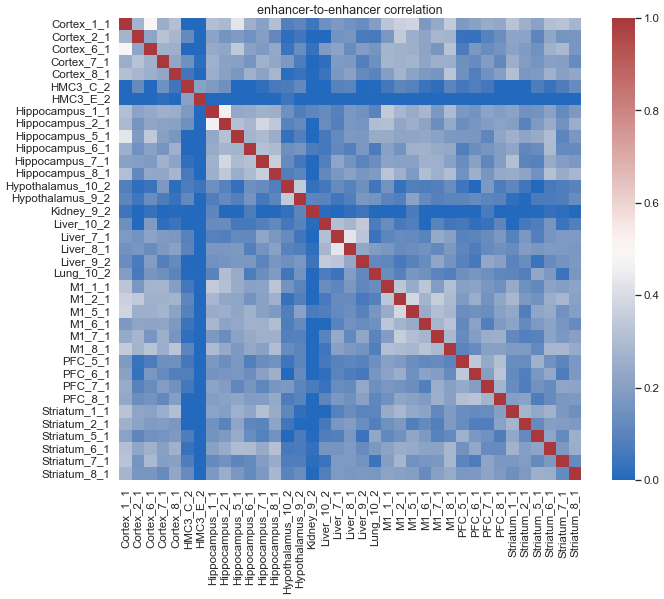

In [24]:
corr = activity_wmean.drop(columns=['seq']).corr(method='pearson')
plt.figure(figsize=(16,12), dpi=50)
sns.heatmap(corr, annot=False, cmap="vlag", vmin=0, vmax=1, square=True)
plt.title("enhancer-to-enhancer correlation")
plt.show()

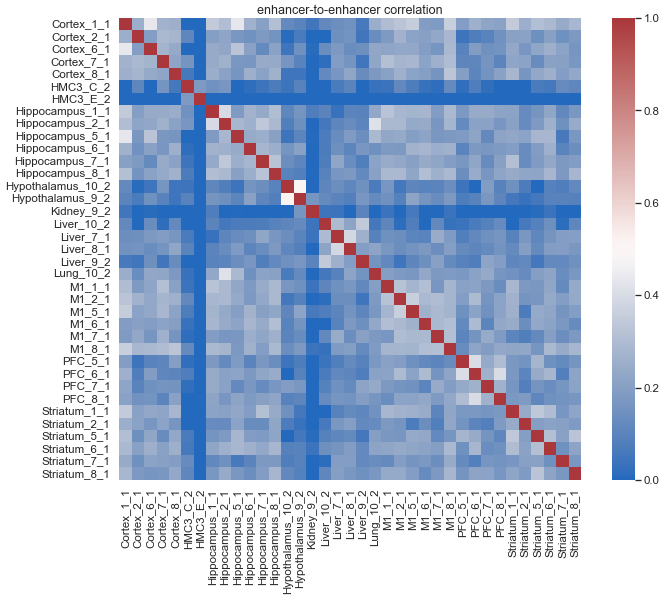

In [25]:
corr = activity_wmean.drop(columns=['seq']).corr(method='spearman')
plt.figure(figsize=(16,12), dpi=50)
sns.heatmap(corr, annot=False, cmap="vlag", vmin=0, vmax=1, square=True)
plt.title("enhancer-to-enhancer correlation")
plt.show()

In [27]:
activity_wmean.to_csv('../data/sysMPRA/sysMPRA_sample_level.csv', index=False)

In [30]:
MPRA_df = pd.read_csv('../data/sysMPRA/sysMPRA_sample_level.csv')

tissues = ['Cortex', 'HMC3', 'Hippocampus', 'Hypothalamus', 'Kidney', 'Liver', 'Lung', 'M1', 'PFC', 'Striatum']
cols = MPRA_df.columns

for tissue in tissues:
    cols_1 = [c for c in MPRA_df.columns if tissue in c]
    MPRA_df[tissue] = MPRA_df[cols_1].mean(axis=1, skipna=True)

MPRA_df = MPRA_df[['seq'] + tissues]
MPRA_df

,seq,Cortex,HMC3,Hippocampus,Hypothalamus,Kidney,Liver,Lung,M1,PFC,Striatum
0,AAAATCAACACTGAGGTGTCAAGCAGAAAAATGAAACCCTGCAGGT...,-0.707,0.508,-1.967,-4.602,-7.204,-1.824,-2.569,-0.549,-2.182,-1.532
1,AAAATCAACAGCAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,-0.630,-0.172,-2.615,-5.912,-7.970,-4.510,-1.987,-0.039,-2.630,-0.905
2,AAAATCAACATTAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,-1.614,0.248,-2.066,-2.205,-6.990,-2.375,-2.353,-2.357,-3.211,-2.556
3,AAAATCAACATTAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,-0.291,-0.256,-0.234,-3.199,-7.520,-1.863,-0.832,-0.553,-2.156,-1.361
4,AAAATCAACATTAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,-1.229,0.534,-0.910,-2.450,-7.083,-3.300,-2.264,-0.629,-2.369,-1.398
...,...,...,...,...,...,...,...,...,...,...,...
451,taaaatggggctaatacagcactttgggaggccaagacgggtggat...,-1.290,-0.054,-0.292,-4.126,-6.108,-2.567,-2.618,-1.218,-3.103,-1.227
452,tcgctcaattcccgcaactactgttgttctGGAGTTGTctcctaaa...,-0.364,-0.036,-0.135,-3.696,-7.437,-2.690,-2.421,-1.127,-1.929,-1.073
453,tcttatttggtttgcctttgtcttcattccctctgagcctgttgcc...,-0.225,0.183,0.213,-2.120,-7.602,-3.362,-1.062,-0.007,-1.936,-0.832
454,tgtagattacaACAACTCCgtttgtctttactctttcggctccgTT...,-1.204,0.072,-0.798,-3.356,-7.124,-1.744,-0.441,-1.099,-2.083,-1.456


In [33]:
MPRA_df.drop(columns=['seq']).isna().sum()

Cortex           0
HMC3             0
Hippocampus      0
Hypothalamus     1
Kidney          10
Liver            1
Lung             2
M1               1
PFC              1
Striatum         0
dtype: int64

In [36]:
MPRA_df = MPRA_df.dropna(axis=0, how='any').reset_index(drop=True)

MPRA_df.to_csv('../data/sysMPRA/sysMPRA_final.csv', index=False)

In [38]:
# DNA_counts = pd.read_csv('../data/sysMPRA/Table 4.csv', index_col=0)
# DNA_counts = DNA_counts[sorted(DNA_counts.columns)]

# RNA_counts = pd.read_csv('../data/sysMPRA/Table 5.csv', index_col=0)
# RNA_counts = RNA_counts[sorted(RNA_counts.columns)]

# DNA_counts = DNA_counts.mask(DNA_counts <= 10, np.nan)
# DNA_counts = DNA_counts / DNA_counts.sum(axis=0, skipna=True) * 1e6

# RNA_counts = RNA_counts.mask(RNA_counts <= 1, np.nan)
# RNA_counts = RNA_counts / RNA_counts.sum(axis=0, skipna=True) * 1e6

# pseudo_count = 1
# activity = np.log2((RNA_counts + pseudo_count) / (DNA_counts + pseudo_count))
# activity = activity.dropna(axis=1, how="all")
# activity["barcode"] = activity.index
# activity["seq"] = activity["barcode"].map(barcode_seq_map)
# activity

In [39]:
# # 方案2 先计算counts sum of barcode

# DNA_counts = pd.read_csv('../data/sysMPRA/Table 4.csv', index_col=0)
# DNA_counts = DNA_counts[sorted(DNA_counts.columns)]

# RNA_counts = pd.read_csv('../data/sysMPRA/Table 5.csv', index_col=0)
# RNA_counts = RNA_counts[sorted(RNA_counts.columns)]

# DNA_counts = DNA_counts.mask(DNA_counts < 10, np.nan)
# DNA_counts = DNA_counts / DNA_counts.sum(axis=0, skipna=True) * 1e6

# RNA_counts = RNA_counts.mask(RNA_counts < 10, np.nan)
# RNA_counts = RNA_counts / RNA_counts.sum(axis=0, skipna=True) * 1e6

# DNA_counts["barcode"] = DNA_counts.index
# DNA_counts["seq"] = DNA_counts["barcode"].map(barcode_seq_map)
# DNA_counts = DNA_counts.drop(columns=["barcode"]).groupby("seq").mean()
# DNA_counts

# RNA_counts["barcode"] = RNA_counts.index
# RNA_counts["seq"] = RNA_counts["barcode"].map(barcode_seq_map)
# RNA_counts = RNA_counts.drop(columns=["barcode"]).groupby("seq").mean()
# RNA_counts

# pseudo_count = 1
# activity = np.log2((RNA_counts + pseudo_count) / (DNA_counts + pseudo_count))
# activity = activity.dropna(axis=1, how="all")
# activity


# corr = activity.corr(method='pearson')
# plt.figure(figsize=(20,16))
# sns.heatmap(corr, annot=False, cmap="vlag", vmin=0, vmax=1, square=True)
# plt.title("enhancer-to-enhancer correlation")
# plt.show()

# # 看起来效果更差

In [40]:
MPRA_df = pd.read_csv('../data/sysMPRA/sysMPRA_final.csv')
MPRA_df

,seq,Cortex,HMC3,Hippocampus,Hypothalamus,Kidney,Liver,Lung,M1,PFC,Striatum
0,AAAATCAACACTGAGGTGTCAAGCAGAAAAATGAAACCCTGCAGGT...,-0.707,0.508,-1.967,-4.602,-7.204,-1.824,-2.569,-0.549,-2.182,-1.532
1,AAAATCAACAGCAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,-0.630,-0.172,-2.615,-5.912,-7.970,-4.510,-1.987,-0.039,-2.630,-0.905
2,AAAATCAACATTAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,-1.614,0.248,-2.066,-2.205,-6.990,-2.375,-2.353,-2.357,-3.211,-2.556
3,AAAATCAACATTAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,-0.291,-0.256,-0.234,-3.199,-7.520,-1.863,-0.832,-0.553,-2.156,-1.361
4,AAAATCAACATTAAGGTGTCAAACAGAAAAATGAAACCCTGCAGGT...,-1.229,0.534,-0.910,-2.450,-7.083,-3.300,-2.264,-0.629,-2.369,-1.398
...,...,...,...,...,...,...,...,...,...,...,...
441,taaaatggggctaatacagcactttgggaggccaagacgggtggat...,-1.290,-0.054,-0.292,-4.126,-6.108,-2.567,-2.618,-1.218,-3.103,-1.227
442,tcgctcaattcccgcaactactgttgttctGGAGTTGTctcctaaa...,-0.364,-0.036,-0.135,-3.696,-7.437,-2.690,-2.421,-1.127,-1.929,-1.073
443,tcttatttggtttgcctttgtcttcattccctctgagcctgttgcc...,-0.225,0.183,0.213,-2.120,-7.602,-3.362,-1.062,-0.007,-1.936,-0.832
444,tgtagattacaACAACTCCgtttgtctttactctttcggctccgTT...,-1.204,0.072,-0.798,-3.356,-7.124,-1.744,-0.441,-1.099,-2.083,-1.456


In [42]:
corr = MPRA_df.drop(columns=['seq']).corr(method='pearson')

In [16]:
corr = (activity.drop(columns=['seq'])).corr(method="spearman")
print(corr)
print(corr.min(), corr.max())

             Cortex   HMC3  Hippocampus  Kidney  Liver   Lung     M1  Muscle    PFC  Striatum
Cortex        1.000 -0.080        0.516  -0.059  0.279  0.305  0.564  -0.049  0.310     0.536
HMC3         -0.080  1.000       -0.126  -0.145 -0.101 -0.058  0.009  -0.065 -0.019    -0.090
Hippocampus   0.516 -0.126        1.000   0.000  0.273  0.354  0.575   0.001  0.372     0.497
Kidney       -0.059 -0.145        0.000   1.000 -0.005 -0.019 -0.053   0.012 -0.038    -0.002
Liver         0.279 -0.101        0.273  -0.005  1.000  0.198  0.258  -0.002  0.245     0.329
Lung          0.305 -0.058        0.354  -0.019  0.198  1.000  0.290   0.026  0.258     0.288
M1            0.564  0.009        0.575  -0.053  0.258  0.290  1.000   0.028  0.382     0.454
Muscle       -0.049 -0.065        0.001   0.012 -0.002  0.026  0.028   1.000 -0.064    -0.105
PFC           0.310 -0.019        0.372  -0.038  0.245  0.258  0.382  -0.064  1.000     0.374
Striatum      0.536 -0.090        0.497  -0.002  0.329  0.28

In [3]:
subprocess.run(
    ['python', 'predict_epi_features/0_predict_epi_feature.py', 
    '-i', 'data/sysMPRA/sysMPRA_final.csv', 
    '-o', 'predict_epi_features/epi_pred/sysMPRA_final_Sei_pred.h5', 
    '-m', 'Sei', 
    '-d', 'cuda:0'],
    cwd='..'
)

predicting predict_epi_features/epi_pred/sysMPRA_final_Sei_pred.h5


  0%|          | 0/1 [00:33<?, ?it/s]
Traceback (most recent call last):
  File "/home/hxcai/cell_type_specific_CRE/MPRA_predict/predict_epi_features/0_predict_epi_feature.py", line 120, in <module>
    pred = get_pred(model, test_data_loader, device, writer, 512)
  File "/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/home/hxcai/cell_type_specific_CRE/MPRA_predict/predict_epi_features/0_predict_epi_feature.py", line 30, in get_pred
    writer.save(output)
AttributeError: 'HDF5Writer' object has no attribute 'save'


CompletedProcess(args=['python', 'predict_epi_features/0_predict_epi_feature.py', '-i', 'data/sysMPRA/sysMPRA_final.csv', '-o', 'predict_epi_features/epi_pred/sysMPRA_final_Sei_pred.h5', '-m', 'Sei', '-d', 'cuda:0'], returncode=1)

In [4]:
pred_array = load_h5('epi_pred/sysMPRA_final_Sei_pred.h5')
print(pred_array.shape)

file outputs/sysMPRA_final_Sei_pred.h5 has keys: []
file has more than one key


AttributeError: 'File' object has no attribute 'shape'

In [49]:
pred_array

<Closed HDF5 file>

In [10]:
subprocess.run(
    ['python', 'train_scripts/test_0504.py', 
    '-s', 'saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/', 
    '-c', 'configs/config_0819_Gosai_MPRA_MyCNNTransformer_Zhang.yaml',
    '-o', 'Zhang_MPRA_pred.npy'],
    cwd='..'
)

use new config: configs/config_0819_Gosai_MPRA_MyCNNTransformer_Zhang.yaml


100%|██████████| 5/5 [00:01<00:00,  2.85it/s]


CompletedProcess(args=['python', 'train_scripts/test_0504.py', '-s', 'saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/', '-c', 'configs/config_0819_Gosai_MPRA_MyCNNTransformer_Zhang.yaml', '-o', 'Zhang_MPRA_pred.npy'], returncode=0)

In [16]:
cell_types = ['K562', 'HepG2', 'HEK293T', 'Jurkat']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [17]:
MPRA_df = pd.read_csv("../data/Zhang_MPRA/Zhang_MPRA_Sei_feature_norm.csv")

In [18]:
y_pred = np.load(f'../saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/Zhang_MPRA_pred.npy')
cols = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cols] = y_pred